In [18]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import citipy
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import time module
import time
# Import linregress (linear regression) from scipy.stats
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

18.90654925231729 -144.1134040699227
-30.334833592576132 104.87001826712554
-66.78847755990068 55.097813229657305
15.813130527371783 -18.389869984787623
45.51123726670241 178.86489557729186
5.809323906678571 113.90230923087228
66.24426763298663 -124.26310931466652
-1.8617263722670714 -60.54526632886652
6.734289682990692 -97.73387841195684
-0.12341568799062941 175.55762948286616
5.940830341024807 -81.63431813105349
-7.836417038749971 88.88200808505508
-49.470048074001504 174.95101439467186
-5.911580085380265 130.7911206242631
-48.07459189083134 14.157492848602459
50.183164444003694 -54.45768672218212
-23.346901920752828 20.5128749078371
-30.036374736093485 118.99921149900678
10.907212228069156 -175.79211680236315
-70.50827588981394 63.20529992159001
38.92453524666175 -64.98660577221851
19.4394437190375 165.0738491056203
-52.47717428873976 -78.26466204476274
42.959930165164366 137.6999956969882
-3.163315207112305 -67.75419164746141
18.290155836313488 -138.93736847397403
-23.8724288005639

48.193561557729225 124.31941970843695
64.12052406634672 -32.251257179876376
11.675037501203846 -10.087638113402562
-51.25608247842319 -63.73050190523482
43.76634653489586 33.4134506381356
43.30268581545499 -104.40991971725136
-37.36447119553141 109.68700216775403
-56.058634838170754 -139.41884683715557
50.096253690925096 -108.88169294567483
22.813353589702317 -7.07145112001507
-19.845898154880558 -116.92423085014528
-15.692062802150303 55.36045557677244
65.9249392852013 -13.118533383992428
-59.40313169620809 -161.48766712835453
-89.38838224810728 155.06315744715107
4.776589740770532 -132.5656720787192
31.60322990684348 171.1417482654395
-64.86402554228619 -74.91471521974916
-66.91384540628742 98.52174574108722
-69.68136244284032 -145.5982407153376
11.699168952639539 -153.79329937793824
-32.709003473445065 -18.20330973664204
1.6352085844256976 -87.41954480816982
77.73391093463786 145.5975631575505
85.179356886498 115.17678254799421
-14.975544021898415 -48.51583277755901
69.5506634319502

83.3241723882881 44.98196000524965
51.63679753880194 -162.39407431088728
-27.806134748753443 -30.822917296299437
-10.868681973431947 -21.77706492467817
-85.39399896207692 -117.24662672170936
72.73733242789584 -7.068026125739351
-47.103070948400585 -160.27412363277364
-3.704052079556817 48.482422197179915
-37.78560056161369 -14.903580059798344
82.92083465922607 151.6861207504645
72.15392070504103 46.57152033263259
13.103820132686593 -116.55056430564404
-56.45351478508077 -166.08036494838348
88.78562640277627 -179.69773969157362
36.28969840275566 -67.21112695101924
59.85716102481135 -156.4247852006194


In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | geraldton
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | dakar
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | miri
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | manaus
Processing Record 9 of Set 1 | pochutla
Processing Record 10 of Set 1 | temaraia
City not found. Skipping...
Processing Record 11 of Set 1 | la palma
Processing Record 12 of Set 1 | padang
Processing Record 13 of Set 1 | dunedin
Processing Record 14 of Set 1 | tual
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | lewisporte
Processing Record 17 of Set 1 | manyana
Processing Record 18 of Set 1 | northam
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | shelburne
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | punta arenas

Processing Record 41 of Set 4 | poum
Processing Record 42 of Set 4 | rodnykove
Processing Record 43 of Set 4 | mangaratiba
Processing Record 44 of Set 4 | yichang
Processing Record 45 of Set 4 | kharsia
Processing Record 46 of Set 4 | college
Processing Record 47 of Set 4 | senador jose porfirio
Processing Record 48 of Set 4 | yabrud
Processing Record 49 of Set 4 | middelburg
Processing Record 50 of Set 4 | weligama
Processing Record 1 of Set 5 | bereda
Processing Record 2 of Set 5 | barabai
Processing Record 3 of Set 5 | san cristobal
Processing Record 4 of Set 5 | peniche
Processing Record 5 of Set 5 | hualmay
Processing Record 6 of Set 5 | lata
Processing Record 7 of Set 5 | tamale
Processing Record 8 of Set 5 | arraial do cabo
Processing Record 9 of Set 5 | rey bouba
Processing Record 10 of Set 5 | tawkar
City not found. Skipping...
Processing Record 11 of Set 5 | samarai
Processing Record 12 of Set 5 | tiznit
Processing Record 13 of Set 5 | ialibu
Processing Record 14 of Set 5 | h

Processing Record 36 of Set 8 | sisimiut
Processing Record 37 of Set 8 | lebu
Processing Record 38 of Set 8 | pangnirtung
Processing Record 39 of Set 8 | clyde river
Processing Record 40 of Set 8 | cap-aux-meules
Processing Record 41 of Set 8 | brownsville
Processing Record 42 of Set 8 | ponta delgada
Processing Record 43 of Set 8 | petrivka
Processing Record 44 of Set 8 | kloulklubed
Processing Record 45 of Set 8 | la sarre
Processing Record 46 of Set 8 | ushibuka
Processing Record 47 of Set 8 | henties bay
Processing Record 48 of Set 8 | nizhniy baskunchak
Processing Record 49 of Set 8 | vasai
Processing Record 50 of Set 8 | dryden
Processing Record 1 of Set 9 | narsaq
Processing Record 2 of Set 9 | taltal
Processing Record 3 of Set 9 | muros
Processing Record 4 of Set 9 | jiddah
City not found. Skipping...
Processing Record 5 of Set 9 | pike creek
Processing Record 6 of Set 9 | harrisonville
Processing Record 7 of Set 9 | kaitangata
Processing Record 8 of Set 9 | panixtlahuaca
City 

Processing Record 23 of Set 12 | ozernovskiy
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | eyl
Processing Record 26 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 27 of Set 12 | suntar
Processing Record 28 of Set 12 | baryatino
Processing Record 29 of Set 12 | laguna
Processing Record 30 of Set 12 | iqaluit
Processing Record 31 of Set 12 | tikhvin
Processing Record 32 of Set 12 | doha
Processing Record 33 of Set 12 | xichang
Processing Record 34 of Set 12 | saleaula
City not found. Skipping...
Processing Record 35 of Set 12 | hovd
Processing Record 36 of Set 12 | mana
Processing Record 37 of Set 12 | tommot
Processing Record 38 of Set 12 | roald
Processing Record 39 of Set 12 | cabedelo
Processing Record 40 of Set 12 | crestview
Processing Record 41 of Set 12 | sorland
Processing Record 42 of Set 12 | auki
Processing Record 43 of Set 12 | aquiraz
Processing Record 44 of Set 12 | kutum
Processing Record 45 of Set 12 | kruisfontein
Processing 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,82.13,75,20,10.36,US,2021-08-04 21:05:38
1,Geraldton,-28.7667,114.6000,45.12,81,0,4.61,AU,2021-08-04 21:08:51
2,Dakar,14.6937,-17.4441,81.48,84,100,10.85,SN,2021-08-04 21:08:51
3,Nikolskoye,59.7035,30.7861,54.01,74,49,2.77,RU,2021-08-04 21:08:52
4,Miri,4.4148,114.0089,77.99,87,99,4.12,MY,2021-08-04 21:08:52
5,Norman Wells,65.2820,-126.8329,55.24,65,100,5.35,CA,2021-08-04 21:08:52
6,Manaus,-3.1019,-60.0250,82.90,78,75,4.61,BR,2021-08-04 21:08:53
7,Pochutla,15.7432,-96.4661,85.82,69,100,5.50,MX,2021-08-04 21:08:53
8,La Palma,33.8464,-118.0467,111.81,56,1,5.99,US,2021-08-04 21:08:53
9,Padang,-0.9492,100.3543,76.48,83,100,2.75,ID,2021-08-04 21:07:50


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [10]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-08-04 21:05:38,19.7297,-155.0900,82.13,75,20,10.36
1,Geraldton,AU,2021-08-04 21:08:51,-28.7667,114.6000,45.12,81,0,4.61
2,Dakar,SN,2021-08-04 21:08:51,14.6937,-17.4441,81.48,84,100,10.85
3,Nikolskoye,RU,2021-08-04 21:08:52,59.7035,30.7861,54.01,74,49,2.77
4,Miri,MY,2021-08-04 21:08:52,4.4148,114.0089,77.99,87,99,4.12
5,Norman Wells,CA,2021-08-04 21:08:52,65.2820,-126.8329,55.24,65,100,5.35
6,Manaus,BR,2021-08-04 21:08:53,-3.1019,-60.0250,82.90,78,75,4.61
7,Pochutla,MX,2021-08-04 21:08:53,15.7432,-96.4661,85.82,69,100,5.50
8,La Palma,US,2021-08-04 21:08:53,33.8464,-118.0467,111.81,56,1,5.99
9,Padang,ID,2021-08-04 21:07:50,-0.9492,100.3543,76.48,83,100,2.75


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

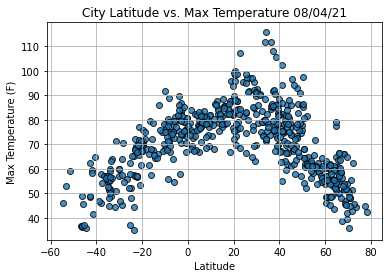

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()

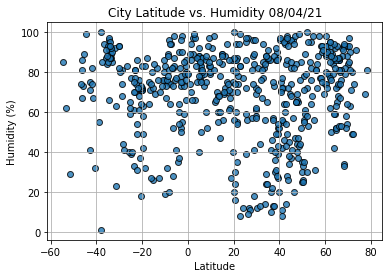

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

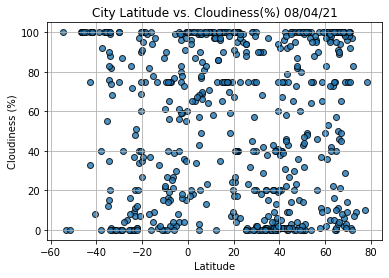

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

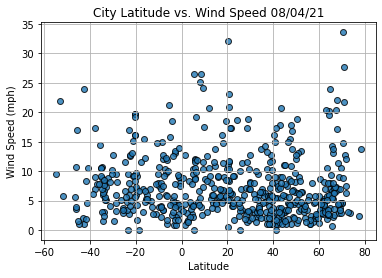

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Basic formula for plotting regression line on lat vs temp. First need to get x and y values for both northern and 
# southern hemispheres

# # Perform linear regression.
# (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# # Calculate the regression line "y values" from the slope and intercept.
# regress_values = x_values * slope + intercept

# # Get the equation of the line.
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Create a scatter plot of the x and y values.
# plt.scatter(x_values,y_values)
# # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
# plt.plot(x_values,regress_values,"r")
# # Annotate the text for the line equation and add its coordinates.
# plt.annotate(line_eq, (10,40), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Temp')
# plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

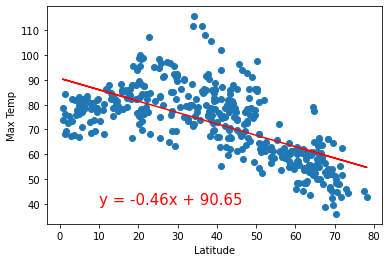

In [24]:
# Linear regression on the Northern Hemisphere, Lats vs Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

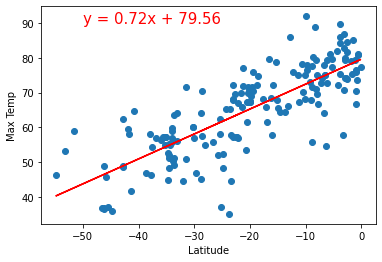

In [26]:
# Linear regression on the Southern Hemisphere, Lats vs Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

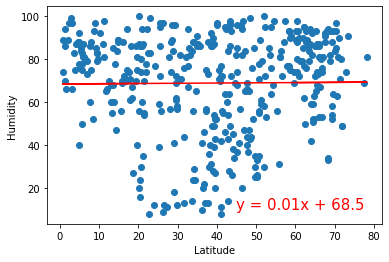

In [31]:
# Linear regression on the Northern Hemisphere, Lats vs Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', 'Humidity',(45,10))

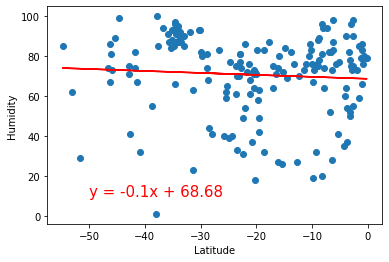

In [34]:
# Linear regression on the Southern Hemisphere, Lats vs Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Humidity', 'Humidity',(-50,10))

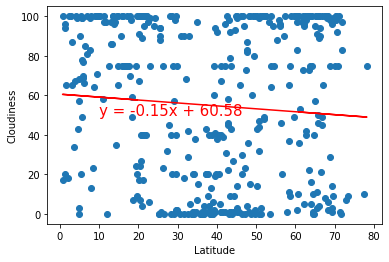

In [38]:
# Linear regression on the Northern Hemisphere, Lat vs Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(10,50))

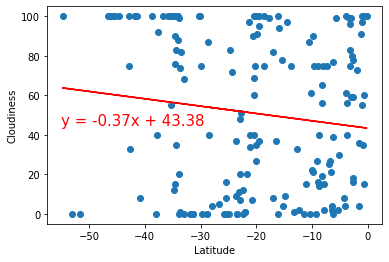

In [43]:
# Linear regression on the Southern Hemisphere, Lat vs Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-55,45))

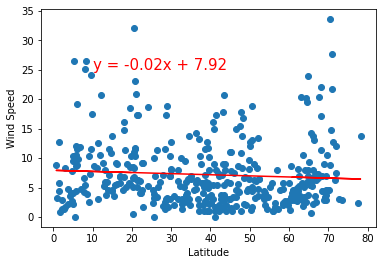

In [48]:
# Linear regression on the Northern Hemisphere, Lat vs Max Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

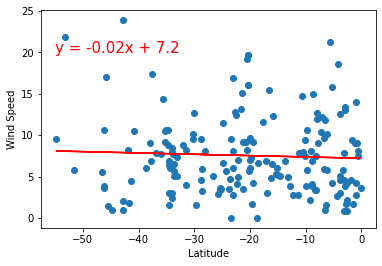

In [50]:
# Linear regression on the Southern Hemisphere, Lat vs Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,20))